### Clear Sky

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import bisect
import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_data_from_csv import *

#### Import  Data

In [2]:
day = '2018-10-12'   # select day of observation (camera 2, sw-vers. 3)
s_time = ' 09:00:00' # beginning of observation
e_time = ' 15:00:00' # end of observation
start = day + s_time
end   = day + e_time

#### Weather station at Luzern Switzerland

In [3]:
luz_csv = r'irradiation_luz_2017_2018.csv'

df_lu = process_LUZ(luz_csv)
df_lu.set_index(df_lu.datetime, inplace=True)
df = df_lu['gre000z0']       # 10 min mean in W/m² 
lu_rad = df.loc[start:end]   # set distinct observation day
lu_rad.dtypes

lu_rad.head(n=2)

datetime
2018-10-12 09:00:00+02:00    163.0
2018-10-12 09:10:00+02:00    191.0
Freq: 10T, Name: gre000z0, dtype: float64

#### Clear Sky solar irradiance from SODA using McClear model
Source: http://www.soda-pro.com/web-services/radiation/cams-mcclear

In [10]:
soda_csv = r'irradiation_soda_2017_2018_1min.csv'

df_soda = process_SODA(soda_csv)
df = df_soda['Clear sky GHI']*60 # in units of Wh/m² 
mc_rad = df.loc[start:end]       # set distinct observation day

mc_rad.head(n=2)

datetime
2018-10-12 09:00:00+02:00    176.496
2018-10-12 09:10:00+02:00    204.678
Name: Clear sky GHI, dtype: float64

#### Solar measurements vs. McClear model

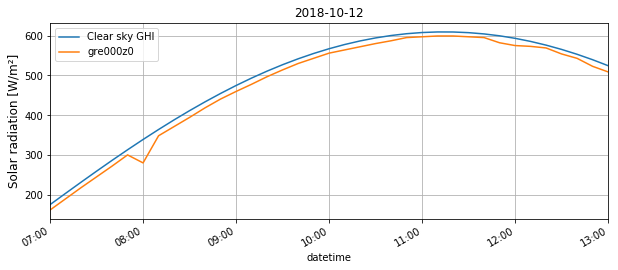

In [11]:
fig = plt.figure(1, figsize=(10,4))
mc_rad.plot()
lu_rad.plot()
#mc_rad.plot(dateaxis, mc_rad, 'm', label='McClear model')
#lu_rad.plot(dateaxis, lu_rad, 'r', label='Solar radiation measurements')
plt.ylabel('Solar radiation [W/m²]', fontsize=12)
plt.legend(loc='upper left')
plt.grid(b=None, which='major', axis='both')
plt.title(day)
fig.autofmt_xdate()
formatter = DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
